## Reading and writing data files

This is more generally known as 'file i/o" where "i" and "o" stand for input and output, respectively.  
Why do we need to do file i/o?

##### File input

The input case is more obvious. To analyze data, you need data to analyze. Unless you know magic, you access data from  *data files*, which are files just like a PDF or whatever, but they are specialized to some degree for containing data. Whether from a colleague, a boss, a webpage, or a government data repository, data will come in a data file that you will need to read as input in order visualize and analyze the data.

##### File output

The output case is perhaps less obvious. You read data into your Jupyter Notebook, you make pretty graphs, you do some cool analysis, and then you show it off to some people. You're done, right? But what if you want to share the numerical values of the analysis with someone else? If you can write those values to a data file and just send that, then they can read in the values on their end without having to wade through your notebook and cutting and pasting or whatever.  

Alternatively, you may have improved a data set by adding a few informative columns. If you can write the data out to a data file, then you can share it, and everybody else can use and enjoy your new improved version of the data file. 

### Let's get started!

#### Import libraries
*Libraries* are organized collections of Python code written to perform related tasks. We met some in the very first tutorial! You will hear of "Libraries", "Packages", and "Modules". Technically, Libraries contain Packages which contain modules. Modules are single files that contain useful functions, Packages are directories to a set of modules (or other packages), and Libraries are directories to a set of packages. That having been said, I tend to refer to them interchagebly as "*useful chunks of pre-written code we can use!*"

##### So, as always, the first thing we need to do is import the libraries we'll likely be using:

* pandas for the i/o
* matplotlib.pyplot and...
* seaborn to plot file contents

*Remember, to run each code cell like the one below, select it and then hit **shift-return** (or shift-enter)*.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now you should have these three libraries available to you via their standard nicknames: pd, plt, and sns.

If 'sns' seems like a weird nickname for 'seaborn', I'll give you hint about it: It's an homage to one of the main characters in one of the best television series ever made. The show ran from 1999 until 2006 on NBC.

### Let's read some data!

There are many ways that data can be stored, from excel files to tables on webpages.

For this tutorial, we are going to read a data file called `006DataFile.csv`, which you should have in the same folder as this notebook if you followed the ReadMe!

We read a .csv file (more on this file type in a bit) using the `pandas.read_csv()` function. But, remember, we have imported pandas as pd, so we read the .csv file, with slightly less typing, like this:

In [4]:
myDataFromFile = pd.read_csv("../datasets/006DataFile.csv")

This command will work "out of the box" if your copy of the data file is in your "*datasets*" directory, which should be a subdirectory of the one this notebook is in. 

Otherwise, you would have to change the command above to specify the path to the data file – where on the file tree the data file exists (either in '*absolute*' terms from root, or in '*relative*' terms from you current directory).

### Let's look at what we just read.

Okay, now let's look at the file. We can take a quick peek by using the `display()` function:

In [5]:
display(myDataFromFile)

,VarA,VarB
0,0.979109,-0.128890
1,0.196564,0.403177
2,0.260841,0.682448
3,2.432641,-0.295968
4,-0.689790,-0.088941
...,...,...
95,2.416932,-1.065406
96,4.166266,-1.053911
97,-0.203719,0.610032
98,1.232813,-0.744738


Here, we can see that this file (like almost all data files) consists of rows and columns. The rows represent *observations* and the columns represent *variables*. This type of data file contains "tidy" data (if you have used R, you may have encountered the tidyverse). Sometimes, we will encounter data files that violate this "rows = observations, columns = variables" rule – untidy data – we will deal with this issue later in the class.

A very common genertic data file type is the comma separated values file, or .csv file. This is the type of data file we just loaded (006DataFile***.csv***). As the name implies, a file in this format consists values separated by commas to form rows, and "carriage returns" (CR) or "line feeds" (LF) marking the end of each row.

---
**Useless Trivia Alert!**:

These terms come from typewritters and old-old-old-school printers, respectively. Typewritters had a "carriage" that held the paper and moved to the left while you typed. When you got to the right edge of the paper, you hit the "*carriage return*" key and the whole carriage flew back (*returned*) to right with a loud clunk and advanced the paper down a line. To this day, the big fat important key on the right side of most keyboards still says "return".

Old-school printers used long continuous "fan fold" sheets of paper (they could be literally hundreds of feet long) and had to be told to advance the paper one line with a "*line feed*" command. Once you were done printing, you ripped/cut your paper off the printer sort of like you do with aluminum foil or plastic wrap!

---

**Useful aside!:**
We can even copy data to the clipboard and read that in. I just copied the [population of Burkina Faso by year](https://en.wikipedia.org/wiki/Burkina_Faso) from wikibedia. And we can read that into a data frame like this:

In [36]:
cb = pd.read_clipboard()

In [37]:
cb

,Year,Million
0,1950,4.3
1,2000,11.6
2,2018,19.8


How cool is that?!?!

---

Okay, now back to the show. In addition to display(), we use can use data frame `methods`. What is a "method"? Methods are things that an object, like a Pandas data frame, already knows how to do. They are actions that an object can perform for you without any additional coding on your part!

One thing a data frame knows how to do is show you its first few rows with the `head()` method:

In [ ]:
myDataFromFile.head()

... or its last few rows with `tail()`:

In [ ]:
myDataFromFile.tail()

But how do you know what methods a given object has? Python's `dir()` function will give you a directory of any objects methods:

In [ ]:
dir(myDataFromFile)

HFS!!! Data frames know how to do a LOT! It's a bit overwhelming actually. We can ignore all the things that look like __this__ at the top. Scrolling the the others, `describe()` looks promising! Let's see what it does!

In [ ]:
myDataFromFile.describe()

OMG, that was a good find!

I also noticed a `hist` method. Could it even be possible that data frames know how to draw histograms of themselves?

array([[<AxesSubplot:title={'center':'VarA'}>,
        <AxesSubplot:title={'center':'VarB'}>]], dtype=object)

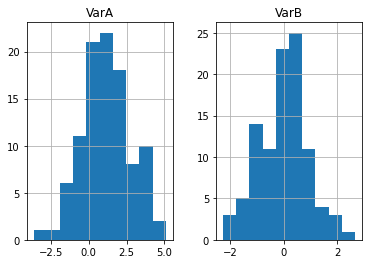

In [6]:
myDataFromFile.hist()

## **NO WAY!!!!!**

#### I'm beginning to suspect our journey of learning to play with data is going to be part learning to code and part figuring how to use what's already out there!

Okay, now let's make a histogram with the Sam – oops! – I mean `seaborn` library. `Seaborn` is a library that really just calls `matplotlib` functions, but it provides a way to use those functions that is easier than using them directly.

It also by default generally makes prettier plots.

Here's a histogram:

<AxesSubplot:ylabel='Count'>

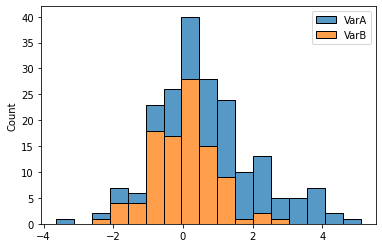

In [7]:
sns.histplot(myDataFromFile, multiple="stack")

##### Google `seaborn.histplot()` to see what the `multiple` argument does and what other possible arguments are. Play around with these to change the appearance of the histogram!

Now let's make Kernel Density Estimate (KDE) plots of the distributions. KDEs are essentially smoothed versions of histograms (we can unpack more about exactly what these are later). They can give us a better visual represtation of the "vibe" of a distribution.

For the KDE plot, we plot each variable in turn, and we'll use the `color` argument in the second plot to set the curves apart:

<AxesSubplot:xlabel='VarA', ylabel='Density'>

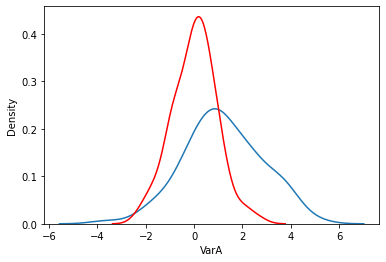

In [8]:
sns.kdeplot(myDataFromFile["VarA"])
sns.kdeplot(myDataFromFile["VarB"], color="r")

Here we can more clearly see the difference in means as compared to the histogram.

We can make the visualization more aethetically appealing by using some of the optional arguments to `seaborn.kdeplot()`

<AxesSubplot:xlabel='VarA', ylabel='Density'>

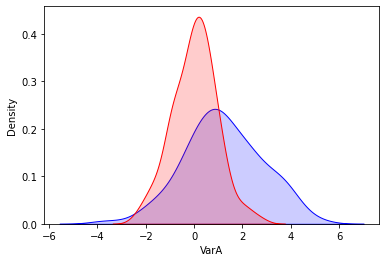

In [9]:
sns.kdeplot(myDataFromFile["VarA"], color="b", fill=True, alpha=0.2)
sns.kdeplot(myDataFromFile["VarB"], color="r", fill=True, alpha=0.2)

The `color` argument is obvious. `fill` colors the area under the curve, and `alpha` make the fill transparent so you can see one curve through the other. Play around with these!

### Let's see if we can write data to a file!

Now maybe we can write a summary of the original data to a file so we could potentially share it with other. What we'll do is use the `descrive()` method again, but this time we'll assign it to new data frame.

In [ ]:
mySummary = myDataFromFile.describe()

Let's just quickly that `mySummary` contains what we hope it does:

In [ ]:
print(mySummary)

Now let's write it to a file! We'll use the `to_csv` method that you can see lurking the output of `dir()` above.

In [ ]:
mySummary.to_csv("mySummary.csv")

Okay, but how do we know that worked? Easy! We'll read that file back in using `pandas.read_csv()` and see what it looks like!

In [ ]:
mySumFF = pd.read_csv("mySummary.csv")

And then we can look at it using `display()`.

In [ ]:
display(mySumFF)

### Sweet! We can now read and write data files. File I/0 handled!